# Become a pandas expert

If you are looking to completely master the pandas library and become a trusted expert for doing data science work, check out my book [Master Data Analysis with Python][1]. It comes with over 300 exercises with detailed solutions covering the pandas library in-depth.

[1]: https://www.dunderdata.com/master-data-analysis-with-python

# 1. Optimize Custom Grouping Function
In this challenge, your goal is to find the fastest solution to the problem while only using the Pandas library.

### The Challenge
The `college_pop` dataset contains the name, state and population of all higher-ed institutions in the US and its territories. For each state, find the percentage of the total state population made up by the 5 largest colleges of that state.

In [1]:
import pandas as pd
college = pd.read_csv('data/college_pop.csv')
college.head()

,name,state,pop
0,Alabama A & M University,AL,4206.0
1,University of Alabama at Birmingham,AL,11383.0
2,Amridge University,AL,291.0
3,University of Alabama in Huntsville,AL,5451.0
4,Alabama State University,AL,4811.0


In [2]:
college['pop_perc'] = college['pop'] / college['pop'].sum()
college.head()

,name,state,pop,pop_perc
0,Alabama A & M University,AL,4206.0,0.000260
1,University of Alabama at Birmingham,AL,11383.0,0.000703
2,Amridge University,AL,291.0,0.000018
3,University of Alabama in Huntsville,AL,5451.0,0.000336
4,Alabama State University,AL,4811.0,0.000297


# 2. Explain the 1,000x Speed Difference when taking the Mean
In this challenge, your goal is to explain why taking the `mean` of the following DataFrame is more than 1,000 faster when using the parameter `numeric_only=True`.

### The Challenge
The `bikes` dataset below has about 50,000 rows. Taking the `mean` of the entire DataFrame returns the mean of all the numeric columns. If we set the parameter `numeric_only` to `True`, the exact same result is returned. But, using the second option results in a speed difference of more than 1,000x, taking the operation from over 40 seconds down to around 15 milliseconds.

The challenge is to explain why there is a speed difference despite each of these operations returning the exact same result. The solution is fairly nuanced and requires a deep understanding of pandas. 

> My understanding is that the second method filters out the non-numerical columns first and then runs the mean operation, while the first method just runs the mean, so it takes more time for the system to opt out the posibility that some columns cannot be returned with mean. 

In [3]:
bikes = pd.read_csv('data/bikes.csv')
bikes.head()

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_name,latitude_end,longitude_end,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events
0,7147,Subscriber,Male,2013-06-28 19:01:00,2013-06-28 19:17:00,993,Lake Shore Dr & Monroe St,41.881050,-87.616970,11.0,Michigan Ave & Oak St,41.900960,-87.623777,15.0,73.9,10.0,12.7,-9999.0,mostlycloudy
1,7524,Subscriber,Male,2013-06-28 22:53:00,2013-06-28 23:03:00,623,Clinton St & Washington Blvd,41.883380,-87.641170,31.0,Wells St & Walton St,41.899930,-87.634430,19.0,69.1,10.0,6.9,-9999.0,partlycloudy
2,10927,Subscriber,Male,2013-06-30 14:43:00,2013-06-30 15:01:00,1040,Sheffield Ave & Kingsbury St,41.909592,-87.653497,15.0,Dearborn St & Monroe St,41.881320,-87.629521,23.0,73.0,10.0,16.1,-9999.0,mostlycloudy
3,12907,Subscriber,Male,2013-07-01 10:05:00,2013-07-01 10:16:00,667,Carpenter St & Huron St,41.894556,-87.653449,19.0,Clark St & Randolph St,41.884576,-87.631890,31.0,72.0,10.0,16.1,-9999.0,mostlycloudy
4,13168,Subscriber,Male,2013-07-01 11:16:00,2013-07-01 11:18:00,130,Damen Ave & Pierce Ave,41.909396,-87.677692,19.0,Damen Ave & Pierce Ave,41.909396,-87.677692,19.0,73.0,10.0,17.3,-9999.0,partlycloudy


In [4]:
bikes.shape

(50089, 19)

In [5]:
bikes.mean(numeric_only=True)

trip_id             9.472308e+06
tripduration        7.168678e+02
latitude_start      4.190001e+01
longitude_start    -8.764464e+01
dpcapacity_start    2.134022e+01
latitude_end        4.190058e+01
longitude_end      -8.764485e+01
dpcapacity_end      2.124171e+01
temperature         6.260824e+01
visibility          8.148827e+00
wind_speed          7.070111e+00
precipitation      -9.239627e+03
dtype: float64

In [6]:
%timeit -n 1 -r 1 bikes.mean()

1min 35s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [7]:
%timeit -n 1 -r 1 bikes.mean(numeric_only=True)

10.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# 3. Multiple Custom Grouping Aggregations

This challenge is going to be fairly difficult, but should answer a question that many pandas users face - What is the best way to do a grouping operation that does many custom aggregations? In this context, a 'custom aggregation' is defined as one that is not directly available to use from pandas and one that you must write a custom function for. 

In Pandas Challenge 1, a single aggregation, which required a custom grouping function, was the desired result. In this challenge, you'll need to make several aggregations when grouping. There are a few different solutions to this problem, but depending on how you arrive at your solution, there could arise enormous performance differences. I am looking for a compact, readable solution with very good performance.

### Sales Data

In this challenge, you will be working with some mock sales data found in the sales.csv file. It contains 200,000 rows and 9 columns.

In [8]:
df = pd.read_csv('data/sales.csv', parse_dates=['date'])
df.head()

,customer_id,date,country,region,delivery_type,cost_type,duration,revenue,cost
0,13763,2019-03-25,Portugal,F,slow,expert,60,553,295
1,13673,2019-12-06,Singapore,I,slow,experienced,60,895,262
2,10287,2018-09-04,India,I,slow,novice,60,857,260
3,14298,2018-06-21,Morocco,F,fastest,expert,120,741,238
4,11523,2019-01-05,Luxembourg,A,fast,expert,120,942,263


In [9]:
df.shape

(200000, 9)

### Challenge

There are many aggregations that you will need to return and it will take some time to understand what they are and how to return them. The following definitions for two time periods will be used throughout the aggregations.

Period **2019H1** is defined as the time period beginning January 1, 2019 and ending June 30, 2019.
Period **2018H1** is defined as the time period beginning January 1, 2018 and ending June 30, 2018.

### Aggregations
Now, I will list all the aggregations that are expected to be returned. Each bullet point represents a single column. Use the first word after the bullet point as the new column name.

For every country and region, return the following:
* recency: Number of days between today's date (11/14/2019) and the maximum value of the 'date' column 
* fast_and_fastest: Number of unique customer_id in period 2019H1 with delivery_type either 'fast' or 'fastest'
> Method 1: Using Boolean Variables; 
  Method 2: Using variable attributes
* rev_2019: Total revenue for the period 2019H1
* rev_2018: Total revenue for the period 2018H1
* cost_2019: Total cost for period 2019H1
* cost_2019_exp: Total cost for period 2019H1 with cost_type 'expert'
* other_cost: Difference between cost_2019 and cost_2019_exp
* **rev_per_60**: Total of revenue when duration equals 60 in period 2019H1 divided by number of unique customer_id when duration equals 60 in period 2019H1 
* profit_margin: Take the difference of rev_2019 and cost_2019_exp then divide by rev_2019. Return as percentage
* **cost_exp_per_60**: Total of cost when duration is 60 and cost_type is 'expert' in period 2019H1 divided by the number of unique customer_id when duration equals 60 and cost_type is 'expert' in period 2019H1 
* growth: Find the percentage growth from revenue in period 2019H1 compared to the revenue in period 2018H1

In [10]:
df['date'].max()

Timestamp('2019-12-06 00:00:00')

In [11]:
recency = pd.to_datetime("2019-12-06") - pd.to_datetime("2019-11-14")
recency

Timedelta('22 days 00:00:00')

In [12]:
# Method 1: Using Boolean Variables
H12019 = (pd.to_datetime(df['date']) > pd.to_datetime("2019-01-01")) & (pd.to_datetime(df['date']) < pd.to_datetime("2019-06-30"))
fast = df['delivery_type'] == ("fast" or "fastest")
fast_and_fastest = df[H12019 & fast]
num = fast_and_fastest['customer_id'].unique()
len(num)

# Method 2: Using variable attributes

1716

In [13]:
rev_2019 = df[H12019]['revenue'].sum()
rev_2019

72023469

In [14]:
H12018 = (pd.to_datetime(df['date']) > pd.to_datetime("2018-01-01")) & (pd.to_datetime(df['date']) < pd.to_datetime("2018-06-30"))
df[H12018]['revenue'].sum()

47182081

In [15]:
cost_2019 = df[H12019]['cost'].sum()
cost_2019

24097010

In [16]:
expert = df['cost_type'] == "expert"
cost_2019_exp = df[H12019 & expert]['cost'].sum()
cost_2019_exp

7985203

In [17]:
diff = df[H12019]['cost'].sum() - df[H12019 & expert]['cost'].sum()
print("The other cost is $" + str(diff))

The other cost is $16111807


In [18]:
# rev_per_60: Total of revenue when duration equals 60 in period 2019H1 divided by number of unique customer_id when duration equals 60 in period 2019H1 
duration = df['duration'] == 60
df[duration & H12019]['revenue'].sum() / len(df[duration & H12019]['customer_id'].unique())

8228.956252863032

In [19]:
"{:.1%}".format((rev_2019 - cost_2019_exp) / rev_2019)

'88.9%'

In [20]:
df[duration & H12019 & expert]['cost'].sum() / len(df[duration & H12019 & expert]['customer_id'].unique())

1586.5744

In [21]:
(rev_2019 - df[H12018]['revenue'].sum()) / (df[H12018]['revenue'].sum())

0.526500473770964

# 4. Finding the Date of the Largest Percentage Stock Price Drop 

In this challenge, you are given a table of closing stock prices for 10 different stocks with data going back as far as 1999. For each stock, find the date where it had its largest one-day percentage loss. The data is found in the `stocks10.csv` file with each stocks ticker symbol as a column name.

In [22]:
stocks = pd.read_csv('data/stocks10.csv', index_col='date', parse_dates=['date'])
stocks.head()

,MSFT,AAPL,SLB,AMZN,TSLA,XOM,WMT,T,FB,V
date,,,,,,,,,,
1999-10-25,29.84,2.32,17.02,82.75,NaN,21.45,38.99,16.78,NaN,NaN
1999-10-26,29.82,2.34,16.65,81.25,NaN,20.89,37.11,17.28,NaN,NaN
1999-10-27,29.33,2.38,16.52,75.94,NaN,20.80,36.94,18.27,NaN,NaN
1999-10-28,29.01,2.43,16.59,71.00,NaN,21.19,38.85,19.79,NaN,NaN
1999-10-29,29.88,2.50,17.21,70.62,NaN,21.47,39.25,20.00,NaN,NaN


### Challenge

There is a nice, fast solution that uses just a minimal amount of code without any loops. Can you return a Series that has the ticker symbols in the index and the date where the largest percentage price drop happened as the values. 

`pct_change`: the percentage change between the current value and the one immediately above it; $result = X_{t+1} - X$ 

In [23]:
stocks.pct_change().idxmin()

MSFT   2000-04-24
AAPL   2000-09-29
SLB    2008-10-15
AMZN   2001-07-24
TSLA   2012-01-13
XOM    2008-10-15
WMT    2018-02-20
T      2000-12-19
FB     2018-07-26
V      2008-10-15
dtype: datetime64[ns]

#### Extra challenge

Can you return a DataFrame with the ticker symbol as the columns and a row for the date and another row for the percentage price drop?

In [24]:
stocks.pct_change().agg(['idxmin', 'min'])

,MSFT,AAPL,SLB,AMZN,TSLA,XOM,WMT,T,FB,V
idxmin,2000-04-24 00:00:00,2000-09-29 00:00:00,2008-10-15 00:00:00,2001-07-24 00:00:00,2012-01-13 00:00:00,2008-10-15 00:00:00,2018-02-20 00:00:00,2000-12-19 00:00:00,2018-07-26 00:00:00,2008-10-15 00:00:00
min,-0.156201,-0.517964,-0.184057,-0.247661,-0.193274,-0.139395,-0.101816,-0.126392,-0.189609,-0.136295


# 5. Keeping Values Within Interquartile Range

### Challenge
For each stock, calculate the [interquartile range (IQR)][1]. Return a DataFrame that satisfies the following conditions:

* Keep values as they are if they are within the IQR
* For values lower than the first quartile, make them equal equal to the exact value of the first quartile
* For values higher than the third quartile, make them equal equal to the exact value of the third quartile

[1]: https://en.wikipedia.org/wiki/Interquartile_range

There is a straightforward solution that completes this challenge in a single line of readable code. Can you find it?

In [25]:
stocks.quantile([.25, .75])

,MSFT,AAPL,SLB,AMZN,TSLA,XOM,WMT,T,FB,V
0.25,19.15,3.91,25.62,40.46,33.9375,32.62,37.62,14.50,62.300,19.4750
0.75,39.26,90.59,66.29,362.70,260.4700,71.81,65.15,26.23,162.305,80.3375


In [26]:
# iqr = df['col'][df['col'].between(df['col'].quantile(.25), df['col'].quantile(.75), inclusive=True)]
stocks['AAPL'][stocks['AAPL'].between(stocks['AAPL'].quantile(.25), stocks['AAPL'].quantile(.75), inclusive=True)]

date
2000-03-01     4.06
2000-03-03     3.99
2000-03-06     3.92
2000-03-10     3.92
2000-03-21     4.21
              ...  
2016-06-27    87.26
2016-06-28    88.73
2016-06-29    89.50
2016-07-05    90.06
2016-07-06    90.57
Name: AAPL, Length: 2518, dtype: float64

# Intro to Pandas

[classnotes by STP](https://www.dunderdata.com/products/intro-to-pandas/categories/1426022/posts/4784792) 

* Filtering 
* **Aggregate** 
* **Aggregating within groups** 
    * Count frequency of one column (value_counts) 
    * Multiple Grouping columns (pivot_tables)
* Tidying, Melt 
* Join, Merge 

In [27]:
filt1 = bikes['tripduration'] > 5000 
bikes[filt1].head()

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_name,latitude_end,longitude_end,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events
18,40924,Subscriber,Male,2013-07-09 13:12:00,2013-07-09 14:42:00,5396,Canal St & Jackson Blvd,41.878114,-87.639971,35.0,Millennium Park,41.881032,-87.624084,35.0,79.0,10.0,13.8,0.0,cloudy
40,61401,Subscriber,Female,2013-07-14 14:08:00,2013-07-14 15:53:00,6274,Wabash Ave & Roosevelt Rd,41.867173,-87.625955,19.0,Lake Shore Dr & Monroe St,41.881050,-87.616970,11.0,87.1,10.0,8.1,-9999.0,partlycloudy
77,87005,Subscriber,Female,2013-07-21 11:35:00,2013-07-21 13:54:00,8299,State St & 19th St,41.856594,-87.627542,15.0,Sheffield Ave & Kingsbury St,41.909592,-87.653497,15.0,82.9,10.0,5.8,-9999.0,mostlycloudy
335,323274,Subscriber,Male,2013-08-25 17:20:00,2013-08-25 19:26:00,7533,McClurg Ct & Illinois St,41.891020,-87.617300,23.0,Lake Shore Dr & Monroe St,41.881050,-87.616970,11.0,87.1,10.0,12.7,-9999.0,clear
504,442585,Subscriber,Male,2013-09-08 03:43:00,2013-09-08 07:20:00,13037,Dearborn Pkwy & Delaware Pl,41.899007,-87.629928,19.0,Sheridan Rd & Irving Park Rd,41.954340,-87.654601,11.0,71.6,10.0,11.5,-9999.0,cloudy


In [28]:
filt2 = bikes['gender'] == 'Male'
# and condition 
filt = filt1 & filt2 
bikes[filt].head()

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_name,latitude_end,longitude_end,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events
18,40924,Subscriber,Male,2013-07-09 13:12:00,2013-07-09 14:42:00,5396,Canal St & Jackson Blvd,41.878114,-87.639971,35.0,Millennium Park,41.881032,-87.624084,35.0,79.0,10.0,13.8,0.0,cloudy
335,323274,Subscriber,Male,2013-08-25 17:20:00,2013-08-25 19:26:00,7533,McClurg Ct & Illinois St,41.891020,-87.617300,23.0,Lake Shore Dr & Monroe St,41.881050,-87.616970,11.0,87.1,10.0,12.7,-9999.0,clear
504,442585,Subscriber,Male,2013-09-08 03:43:00,2013-09-08 07:20:00,13037,Dearborn Pkwy & Delaware Pl,41.899007,-87.629928,19.0,Sheridan Rd & Irving Park Rd,41.954340,-87.654601,11.0,71.6,10.0,11.5,-9999.0,cloudy
2565,1354900,Subscriber,Male,2014-04-07 17:16:00,2014-04-07 19:54:00,9491,Dearborn St & Monroe St,41.881320,-87.629521,27.0,Larrabee St & Kingsbury St,41.897764,-87.642884,27.0,50.0,10.0,5.8,-9999.0,cloudy
3406,1715861,Subscriber,Male,2014-05-19 09:26:00,2014-05-19 10:50:00,5059,Franklin St & Lake St,41.885837,-87.635500,23.0,Michigan Ave & Pearson St,41.897660,-87.623510,23.0,64.0,10.0,13.8,-9999.0,mostlycloudy


In [29]:
# or condition 
filt = filt1 | filt2 
bikes[filt].head()

,trip_id,usertype,gender,starttime,stoptime,tripduration,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_name,latitude_end,longitude_end,dpcapacity_end,temperature,visibility,wind_speed,precipitation,events
0,7147,Subscriber,Male,2013-06-28 19:01:00,2013-06-28 19:17:00,993,Lake Shore Dr & Monroe St,41.881050,-87.616970,11.0,Michigan Ave & Oak St,41.900960,-87.623777,15.0,73.9,10.0,12.7,-9999.0,mostlycloudy
1,7524,Subscriber,Male,2013-06-28 22:53:00,2013-06-28 23:03:00,623,Clinton St & Washington Blvd,41.883380,-87.641170,31.0,Wells St & Walton St,41.899930,-87.634430,19.0,69.1,10.0,6.9,-9999.0,partlycloudy
2,10927,Subscriber,Male,2013-06-30 14:43:00,2013-06-30 15:01:00,1040,Sheffield Ave & Kingsbury St,41.909592,-87.653497,15.0,Dearborn St & Monroe St,41.881320,-87.629521,23.0,73.0,10.0,16.1,-9999.0,mostlycloudy
3,12907,Subscriber,Male,2013-07-01 10:05:00,2013-07-01 10:16:00,667,Carpenter St & Huron St,41.894556,-87.653449,19.0,Clark St & Randolph St,41.884576,-87.631890,31.0,72.0,10.0,16.1,-9999.0,mostlycloudy
4,13168,Subscriber,Male,2013-07-01 11:16:00,2013-07-01 11:18:00,130,Damen Ave & Pierce Ave,41.909396,-87.677692,19.0,Damen Ave & Pierce Ave,41.909396,-87.677692,19.0,73.0,10.0,17.3,-9999.0,partlycloudy


In [37]:
# Not applicable 
cr = college.loc[:, 'ugds_white': 'ugds_unkn']
cr.head()

KeyError: 'ugds_white'

In [38]:
college_pop.mean()

distance           0.005583
population      2356.837940
sat_verbal       522.819409
sat_math         530.765050
age_25_above       0.410021
dtype: float64

In [31]:
college.mean()

pop         2356.837940
pop_perc       0.000145
dtype: float64

In [39]:
# aggregating methods 
college_pop.sum(axis = 1).head()

0     5050.1049
1    12518.2422
2      292.8540
3     6636.2640
4     5666.1270
dtype: float64

In [33]:
# non-aggregating methods, that don't return one single value 
college.round(2).head()  # reserves 2 digits 

,name,state,pop,pop_perc
0,Alabama A & M University,AL,4206.0,0.0
1,University of Alabama at Birmingham,AL,11383.0,0.0
2,Amridge University,AL,291.0,0.0
3,University of Alabama in Huntsville,AL,5451.0,0.0
4,Alabama State University,AL,4811.0,0.0


In [40]:
ins = pd.read_csv("data/insurance.csv")
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [41]:
# count frequency of one column 
ins['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [51]:
ins.groupby(['sex']).agg({'charges': 'mean'}).round(-3)
# SELECT charges, GROUPBY sex, ROUND UP TO thousands 

,charges
sex,
female,13000.0
male,14000.0


In [50]:
# Group by multiple columns; or using Groupers 
ins.groupby(['sex', 'region']).agg({'charges': ['mean', 'count', 'max']}).round(0)

charges               
                     mean count      max
sex    region                           
female northeast  12953.0   161  58571.0
       northwest  12480.0   164  55135.0
       southeast  13500.0   175  63770.0
       southwest  11274.0   162  48824.0
male   northeast  13854.0   163  48549.0
       northwest  12354.0   161  60021.0
       southeast  15880.0   189  62593.0
       southwest  13413.0   163  52591.0

In [52]:
pt = ins.pivot_table(index = 'sex', columns = 'region', 
                     values = 'charges', aggfunc = 'mean').round(0)
pt

region,northeast,northwest,southeast,southwest
sex,,,,
female,12953.0,12480.0,13500.0,11274.0
male,13854.0,12354.0,15880.0,13413.0


In [53]:
pt.style.highlight_max()

region,northeast,northwest,southeast,southwest
sex,,,,
female,12953.000000,12480.000000,13500.000000,11274.000000
male,13854.000000,12354.000000,15880.000000,13413.000000


In [55]:
# string manipulation; extract data/figure from a string 
pc = pd.read_csv("data/planecrashinfo.csv", na_values = "?")
pc['aboard'].str.extract(r'(\d+)?\D*(\d+)?\D*(\d+)?').head()

,0,1,2
0,2,1,1
1,1,0,1
2,5,0,5
3,1,0,1
4,20,NaN,NaN


In [57]:
aad = pd.read_csv("data/average_arrival_delay.csv")
aad.melt(id_vars = 'airline').head(28)

,airline,variable,value
0,AA,ATL,4.0
1,AS,ATL,6.0
2,B6,ATL,NaN
3,DL,ATL,0.0
4,EV,ATL,7.0
5,F9,ATL,20.0
6,HA,ATL,NaN
7,MQ,ATL,21.0
8,NK,ATL,26.0
9,OO,ATL,9.0


In [58]:
from sqlalchemy import create_engine 
engine = create_engine('sqlite:///../data/neuralips2015.sqlite')

In [59]:
authors = pd.read_sql('Authors', engine)

OperationalError: (sqlite3.OperationalError) unable to open database file
(Background on this error at: http://sqlalche.me/e/e3q8)

In [61]:
pa.merge(authors, how = 'left', left_on = 'AuthorID', right_on = 'Id')

NameError: name 'pa' is not defined

In [62]:
# APPL stock price 
aapl = pd.read_json('https://api.iextrading.com/1.0/stock/aapl/chart/5y')
appl = appl.set_index('date')
appl.head()
# Forbidden web access 

HTTPError: HTTP Error 403: Forbidden

In [63]:
stocks['2017-02':'2017-03']

,MSFT,AAPL,SLB,AMZN,TSLA,XOM,WMT,T,FB,V
date,,,,,,,,,,
2017-02-01,60.45,123.36,75.01,832.35,249.24,74.10,62.09,35.99,133.23,80.94
2017-02-02,60.06,123.15,74.35,839.95,251.55,74.55,62.53,35.24,130.84,80.80
2017-02-03,60.54,123.68,74.40,810.20,251.33,74.63,62.34,35.30,130.98,84.51
2017-02-06,60.50,124.84,73.67,807.64,257.77,74.43,62.25,35.14,132.06,84.26
2017-02-07,60.30,126.02,73.12,812.50,257.48,73.94,62.71,35.19,131.84,84.21
2017-02-08,60.22,126.51,73.16,819.71,262.08,73.46,63.57,35.27,134.20,83.54
2017-02-09,60.90,127.43,73.24,821.36,269.20,73.78,64.76,35.35,134.14,84.02
2017-02-10,60.85,127.14,74.10,827.46,269.23,74.39,63.77,35.41,134.19,84.33
2017-02-13,61.53,128.26,74.24,836.53,280.60,74.83,63.53,34.79,134.05,84.86


In [65]:
# Group by time (e.g. month)
stocks_mc = stocks['AAPL'].resample('M').agg({'close': 'mean'})
stocks_mc.head()

       date      
close  1999-10-31    2.394000
       1999-11-30    2.804286
       1999-12-31    3.222273
       2000-01-31    3.221500
       2000-02-29    3.480000
Name: AAPL, dtype: float64

## Visualization 

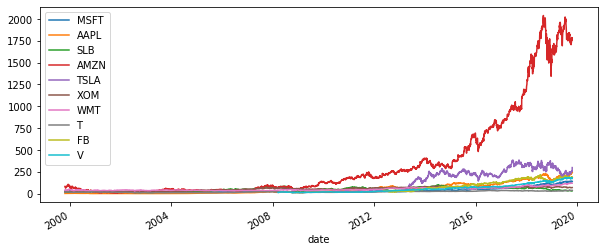

In [66]:
%matplotlib inline 
stocks.plot(kind = 'line', figsize = (10,4))

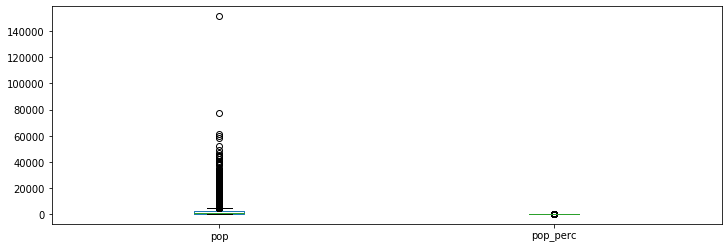

In [67]:
college.plot(kind = 'box', figsize = (12,4))

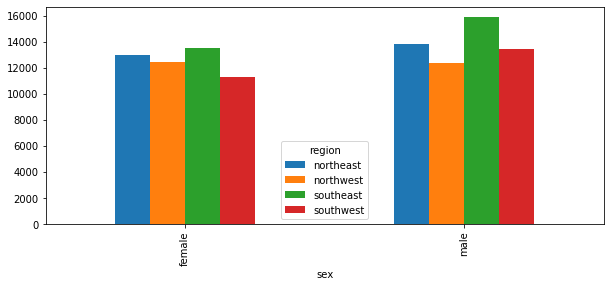

In [68]:
pt.plot(kind = 'bar', figsize = (10,4))